In [1]:
import tensorflow as tf

from keras.models import load_model

import cv2
import numpy as np
import matplotlib.pyplot as plt

import os

In [2]:
def getOneHotkeyLabels(dataset_image_path_list, index_of_classname):
  onehotkeyLabels = []

  for path in dataset_image_path_list:
    classname = path.split('/')[index_of_classname]

    if classname not in onehotkeyLabels:
      onehotkeyLabels.append(classname)

  return onehotkeyLabels

In [3]:
def predictDatas(model, predict_path, image_width, oneHotkeyLabels):
  for item in os.listdir(predict_path):
    file_path = os.path.join(predict_path, item)

    if os.path.isfile(file_path):
      originalImage = cv2.imread(file_path , cv2.COLOR_BGR2RGB)

      # Convert Gray sys. image to RGB sys.
      if len(originalImage.shape) == 2:
        originalImage = cv2.cvtColor(originalImage, cv2.COLOR_GRAY2RGB)
      
      showImage = cv2.cvtColor(originalImage, cv2.COLOR_RGB2BGR)

      predictData = cv2.resize(originalImage,(image_width,image_width))
      predictData =  np.array(predictData)
      predictData = tf.keras.applications.xception.preprocess_input(predictData)
      predictData = np.reshape(predictData ,(1,image_width,image_width,3))

      predict = model.predict(predictData)

      result = oneHotkeyLabels[np.argmax(predict)]
  
      print('Filename :{} '.format(item))
      print('Predict value : {}'.format(predict))
      print('Predict : {}'.format(result))

      plt.imshow(showImage)
      plt.show()
      print()

In [4]:
path_model = os.path.join(os.getcwd(),'drive','MyDrive','Colab Notebooks','model')
path_dataset_predict = os.path.join(os.getcwd(),'drive','MyDrive','Colab Notebooks','dataset_predict')
path_dataset = os.path.join(os.getcwd(),'drive','MyDrive','Colab Notebooks','dataset')

dataset_image_path_list = list(filter(os.path.isdir, list(map(path_dataset.__add__, map('/'.__add__, os.listdir(path_dataset))))))
dataset_image_path_list.sort()

print('path_model : {} '.format(path_model))
print('path_dataset_predict : {} '.format(path_dataset_predict))
print('dataset_image_path_list : {} '.format(dataset_image_path_list))

path_model : /content/drive/MyDrive/Colab Notebooks/model 
path_dataset_predict : /content/drive/MyDrive/Colab Notebooks/dataset_predict 
dataset_image_path_list : ['/content/drive/MyDrive/Colab Notebooks/dataset/baseball', '/content/drive/MyDrive/Colab Notebooks/dataset/basketball', '/content/drive/MyDrive/Colab Notebooks/dataset/beachballs', '/content/drive/MyDrive/Colab Notebooks/dataset/billiard ball', '/content/drive/MyDrive/Colab Notebooks/dataset/bowling ball', '/content/drive/MyDrive/Colab Notebooks/dataset/brass', '/content/drive/MyDrive/Colab Notebooks/dataset/buckeyballs', '/content/drive/MyDrive/Colab Notebooks/dataset/cannon ball', '/content/drive/MyDrive/Colab Notebooks/dataset/cricket ball', '/content/drive/MyDrive/Colab Notebooks/dataset/eyeballs', '/content/drive/MyDrive/Colab Notebooks/dataset/football', '/content/drive/MyDrive/Colab Notebooks/dataset/golf ball', '/content/drive/MyDrive/Colab Notebooks/dataset/marble', '/content/drive/MyDrive/Colab Notebooks/dataset/m

In [5]:
image_width = 128

# **Model Loading**

In [6]:
model = load_model(path_model)

# **Data Prediction**

OneHotkeyLabels : ['baseball', 'basketball', 'beachballs', 'billiard ball', 'bowling ball', 'brass', 'buckeyballs', 'cannon ball', 'cricket ball', 'eyeballs', 'football', 'golf ball', 'marble', 'meat ball', 'medicine ball', 'paint balls', 'puffballs', 'screwballs', 'soccer ball', 'tennis ball', 'volley ball', 'water polo ball', 'wiffle ball', 'wrecking ball'] 

Filename :4 (1).jpg 
Predict value : [[9.60160833e-05 3.69493937e-05 3.68770998e-04 9.90000308e-01
  5.28864875e-05 5.13203076e-06 4.01197326e-07 1.59246412e-07
  1.18483049e-05 2.23069560e-06 2.27459241e-04 1.26829555e-05
  8.65499806e-06 6.07338450e-07 1.15849043e-05 5.66812123e-05
  3.93907940e-05 6.77916396e-05 1.75744663e-05 9.81290359e-05
  3.12188943e-03 2.64791906e-05 5.71414083e-03 2.24801443e-05]]
Predict : billiard ball


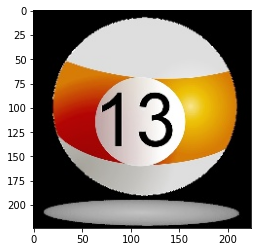


Filename :5 (1).jpg 
Predict value : [[4.9945061e-06 3.2196789e-07 1.3912349e-06 9.9929106e-01 9.0574804e-07
  2.4000700e-08 4.8597298e-07 2.9038690e-08 1.1091099e-06 3.1881800e-07
  3.2011103e-05 1.2982189e-06 2.4512275e-07 9.5777011e-08 2.2723041e-06
  1.4362423e-06 4.0505819e-07 8.1437173e-07 2.8286047e-08 7.4698710e-06
  1.9331471e-06 1.0367201e-05 6.4012100e-04 7.4058016e-07]]
Predict : billiard ball


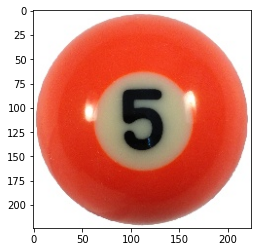


Filename :4 (2).jpg 
Predict value : [[7.21339256e-06 5.36507468e-06 7.46455230e-03 2.52697442e-04
  7.12682307e-01 2.11609830e-03 1.95096118e-06 2.00006816e-05
  2.15972238e-03 4.17692991e-06 7.12891982e-04 6.50388301e-07
  2.90898151e-06 1.65429839e-07 2.90806493e-05 1.22967995e-05
  2.59438548e-06 1.02157774e-05 5.39731559e-07 1.46729231e-04
  8.34631464e-06 6.21829759e-06 2.74351805e-01 1.51364100e-06]]
Predict : bowling ball


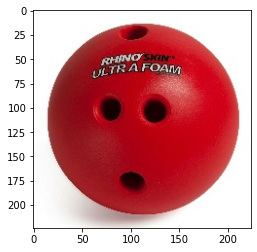


Filename :2 (1).jpg 
Predict value : [[7.0705966e-07 4.4463448e-07 5.9421918e-08 3.7991604e-06 6.8406975e-01
  2.5327844e-04 5.5958449e-06 3.1216699e-01 4.4929305e-07 9.6333997e-06
  3.2376908e-04 6.7937566e-07 6.9362795e-05 1.9647412e-05 4.5637557e-06
  1.5946611e-07 8.0141335e-06 3.9494975e-07 8.8740017e-06 1.2860846e-06
  1.3385662e-07 1.3508420e-08 7.2068762e-04 2.3315956e-03]]
Predict : bowling ball


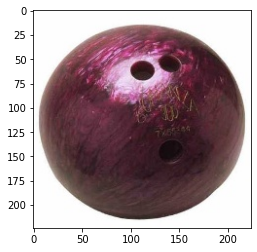


Filename :5 (2).jpg 
Predict value : [[5.0723088e-06 1.9269412e-06 1.5303249e-03 9.8695862e-04 3.7325785e-01
  6.2202168e-01 8.2065435e-07 2.1902188e-05 2.5754358e-04 1.2354895e-06
  1.3796941e-06 2.2202312e-05 6.1174529e-04 8.2529363e-07 7.5777093e-06
  8.7893329e-04 2.7529472e-06 1.6018719e-06 3.3758583e-06 3.4045184e-05
  2.9632583e-05 1.3462075e-06 2.9985615e-04 1.9429614e-05]]
Predict : brass


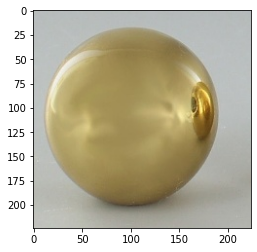


Filename :5.jpg 
Predict value : [[2.2410086e-05 6.0513553e-06 1.8117547e-05 4.0624359e-06 1.1960325e-05
  2.3101918e-06 6.9911615e-04 1.1838440e-06 1.3400562e-05 4.2603426e-07
  3.1114212e-07 1.4121302e-02 6.8164933e-05 2.1847941e-06 2.6441470e-03
  1.2505185e-06 9.8441124e-06 4.4794422e-07 9.6553737e-01 1.5363468e-05
  1.4989324e-02 4.0919951e-04 1.3645202e-03 5.7612655e-05]]
Predict : soccer ball


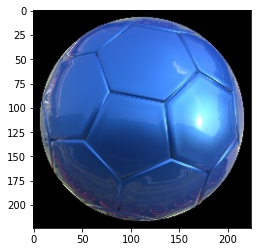


Filename :3 (1).jpg 
Predict value : [[1.2878262e-05 7.9925439e-06 7.7744116e-05 1.6995806e-05 3.3041518e-03
  9.6448821e-01 2.4119711e-06 2.9750293e-02 2.0937131e-04 5.3387644e-06
  3.9372582e-05 3.6709363e-05 5.1041029e-04 4.3502728e-06 2.1614379e-04
  2.1359163e-04 1.0121200e-05 2.2832926e-06 5.9605100e-06 6.1258528e-04
  6.3917973e-06 1.0190940e-06 1.3583004e-04 3.2989250e-04]]
Predict : brass


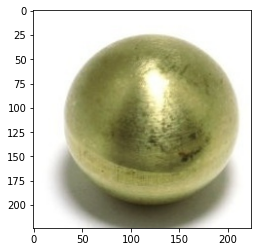


Filename :2 (2).jpg 
Predict value : [[2.3315731e-03 4.0709254e-04 3.9329540e-04 6.6336259e-02 1.8632892e-04
  1.4243889e-04 1.5827376e-01 1.0939927e-03 2.1387250e-05 1.5502523e-04
  1.0935264e-05 4.6237448e-05 3.0144909e-01 2.9543468e-03 1.8603809e-03
  7.2149806e-02 2.9433731e-05 1.5070401e-04 3.5174374e-02 3.3471358e-01
  7.0475490e-04 5.5124555e-03 1.5215697e-02 6.8700052e-04]]
Predict : tennis ball


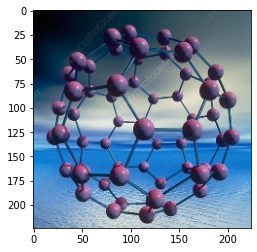


Filename :3 (2).jpg 
Predict value : [[1.9660754e-06 1.4663201e-04 3.1132998e-07 5.2909113e-06 8.2219373e-07
  7.0278183e-08 9.9937820e-01 1.2517599e-07 2.4254568e-05 1.2547459e-06
  2.9064731e-07 1.2285353e-06 2.6138086e-04 5.4343409e-06 6.6093198e-06
  9.5071374e-07 1.9493525e-06 2.4823237e-07 7.2138323e-06 1.0600902e-06
  1.3503557e-06 8.9756591e-05 4.7840217e-06 5.8767611e-05]]
Predict : buckeyballs


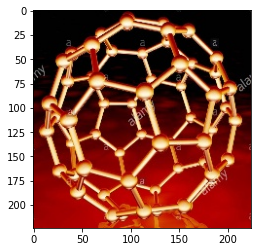


Filename :2 (3).jpg 
Predict value : [[1.8888079e-07 8.5456535e-02 1.2306531e-05 4.1526519e-08 3.9315077e-05
  3.6476257e-07 1.4625815e-07 9.8130397e-07 2.5061115e-03 1.0667440e-07
  5.4514396e-04 2.9114767e-07 5.2902988e-06 1.8385699e-06 1.3961342e-04
  7.9435830e-07 2.4026156e-07 3.3086460e-06 2.4668757e-06 4.3534470e-07
  1.8362167e-04 9.1109872e-01 8.4915301e-09 2.2493912e-06]]
Predict : water polo ball


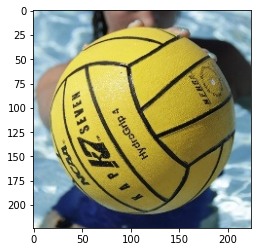


Filename :4 (3).jpg 
Predict value : [[1.8183876e-07 1.3803886e-07 1.4659121e-04 1.4396680e-07 1.9931541e-07
  3.0705752e-10 6.1930983e-10 1.5656364e-10 2.3011270e-07 4.2753753e-10
  1.8009878e-07 1.2893937e-06 1.1237065e-07 2.9981542e-09 1.2348879e-06
  1.5174720e-07 2.9287929e-08 2.3521979e-08 1.8740100e-07 1.1644370e-06
  9.9962044e-01 2.1437444e-04 1.3287519e-05 3.9795602e-09]]
Predict : volley ball


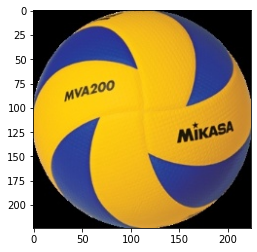


Filename :1 (1).jpg 
Predict value : [[1.5180718e-05 1.0748169e-04 6.5680098e-04 6.2350459e-06 1.6049791e-05
  1.2937920e-07 2.1977708e-07 4.5634847e-06 1.9870181e-06 5.2132133e-08
  7.6431204e-03 1.1793134e-03 7.1241942e-07 7.0034645e-07 6.1671417e-03
  2.4661858e-06 8.6241616e-06 1.6150506e-06 4.0159680e-04 9.8813391e-05
  9.5060551e-01 3.1499881e-02 1.5005175e-03 8.1138329e-05]]
Predict : volley ball


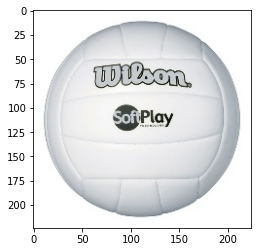


Filename :3 (3).jpg 
Predict value : [[1.1755107e-08 4.3661599e-05 3.4171897e-08 2.6776170e-09 2.6355994e-07
  8.5814784e-12 1.5814537e-09 3.2764657e-08 1.9237300e-06 1.9726007e-09
  2.4652341e-05 1.7456111e-06 1.0464038e-06 1.5147723e-09 1.7140837e-05
  1.4699750e-09 1.0829200e-06 1.9241337e-08 9.9130903e-10 9.9985301e-01
  1.3618965e-05 4.1304080e-05 9.0298241e-11 2.8797820e-07]]
Predict : tennis ball


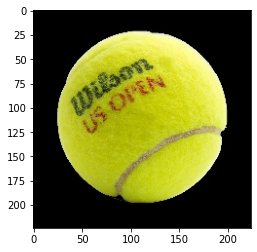


Filename :2 (4).jpg 
Predict value : [[1.0093152e-05 2.6727986e-07 3.4202721e-08 3.1538722e-08 1.4235215e-05
  1.2844743e-05 1.1354318e-08 3.8181315e-07 9.9994957e-01 4.3408659e-06
  3.0975835e-07 5.7031308e-08 4.8067109e-06 5.6095497e-09 2.4058833e-08
  9.2391161e-09 3.1627277e-08 2.5462038e-08 7.6265022e-10 2.6684497e-06
  2.3823846e-08 2.8730193e-08 2.3510658e-08 2.3252923e-07]]
Predict : cricket ball


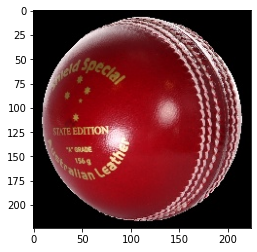


Filename :2 (5).jpg 
Predict value : [[1.4902621e-06 1.8000367e-08 6.1159550e-10 4.4662791e-08 3.7596934e-08
  1.1705262e-09 7.9469947e-07 5.7389958e-08 5.3576986e-07 4.0339504e-10
  1.3232403e-07 9.9998534e-01 1.1879602e-08 8.7172020e-07 1.0360151e-08
  4.5002182e-08 3.8595595e-06 5.1699161e-09 9.9687767e-08 5.1320599e-06
  4.6399587e-10 3.3954340e-08 1.5096590e-06 4.6605141e-08]]
Predict : golf ball


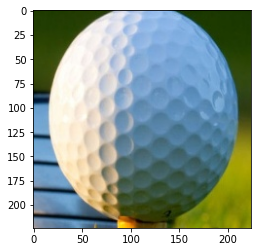


Filename :2.jpg 
Predict value : [[2.0743670e-05 5.0656723e-07 3.3956080e-06 1.4213114e-06 2.2017605e-06
  8.3801922e-08 9.0702575e-05 2.0794253e-07 9.0793526e-07 3.3927240e-08
  3.0282408e-08 3.5522250e-03 3.7776990e-06 4.3865370e-07 1.8995357e-04
  8.6836089e-08 4.0289674e-06 2.7434808e-07 9.9536961e-01 1.1208554e-06
  4.0520722e-04 2.6257901e-06 3.4045253e-04 9.9722183e-06]]
Predict : soccer ball


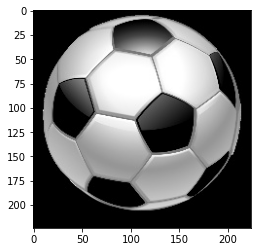


Filename :3 (4).jpg 
Predict value : [[3.3691311e-08 3.6942307e-08 5.6666016e-10 2.7979601e-08 9.2259590e-08
  1.9629107e-09 1.3882216e-07 7.2664285e-08 9.8722488e-09 5.3710738e-09
  1.6022094e-09 3.5053238e-10 6.9527357e-07 9.9999833e-01 1.1630394e-09
  7.3618075e-08 1.1301875e-07 1.8894275e-09 2.4124927e-09 2.1650797e-08
  1.0313362e-08 2.3648902e-07 5.5047594e-10 1.6480116e-07]]
Predict : meat ball


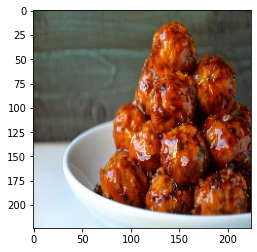


Filename :3.jpg 
Predict value : [[8.71772408e-01 1.07218420e-05 1.26454715e-05 9.76692931e-08
  1.21984797e-07 7.20069636e-07 2.16194938e-08 1.56835813e-06
  1.27816185e-01 3.35954091e-08 3.57145182e-04 8.47474530e-06
  3.82657618e-06 6.07150739e-08 1.93233586e-06 1.22438689e-06
  4.89808258e-07 7.12066196e-07 6.13775626e-07 6.42208033e-06
  3.37088636e-06 1.53941588e-08 3.63383435e-07 8.14738200e-07]]
Predict : baseball


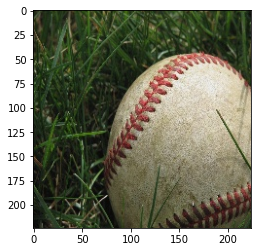


Filename :4 (4).jpg 
Predict value : [[1.2800578e-07 2.3827061e-08 9.0792417e-07 2.5771824e-06 4.6836128e-03
  3.2987100e-06 2.1970543e-06 1.5227449e-06 6.8037747e-07 3.4036447e-07
  1.5632706e-05 5.5889990e-09 9.5827352e-07 3.2713680e-07 4.2268383e-08
  2.6528079e-08 6.7234787e-08 1.6904782e-08 3.2825355e-08 1.0659263e-06
  9.8035422e-08 1.0934708e-06 9.9528533e-01 5.2354114e-08]]
Predict : wiffle ball


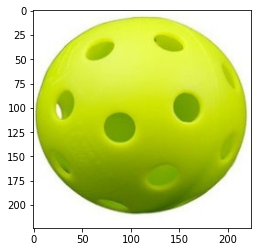


Filename :4.jpg 
Predict value : [[7.0589695e-06 2.2130154e-05 6.3149655e-06 9.8351782e-05 3.4771867e-06
  2.6180858e-08 8.1619658e-07 4.7584675e-05 2.7152419e-05 4.0033530e-07
  2.4927584e-05 5.0158906e-06 3.9890386e-07 3.3657820e-06 8.8747113e-04
  1.3692046e-06 2.4650553e-06 1.9094714e-05 1.5001561e-06 7.2661524e-06
  1.9372828e-01 8.0510217e-01 6.9107119e-07 2.7339329e-06]]
Predict : water polo ball


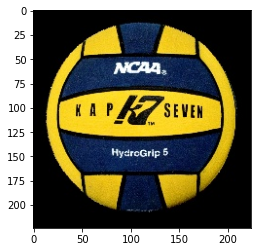


Filename :1 (2).jpg 
Predict value : [[6.26628798e-06 2.81880807e-06 1.82104268e-04 4.60628682e-04
  5.04469052e-02 1.13110309e-05 3.89651570e-04 2.51991569e-05
  7.49090805e-06 1.54717185e-07 5.98855308e-07 9.31485847e-05
  2.52392638e-04 2.22164817e-06 5.58187867e-06 5.52725942e-06
  2.65976232e-05 1.07316578e-06 1.54696684e-03 2.98671603e-06
  3.37831414e-04 1.08580725e-05 9.46143031e-01 3.86704633e-05]]
Predict : wiffle ball


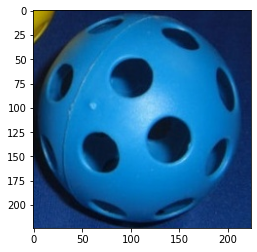


Filename :1.jpg 
Predict value : [[9.9987662e-01 2.6307524e-07 4.1517163e-07 3.5732632e-09 7.7701614e-09
  3.4504269e-10 8.4190122e-10 2.4364530e-08 1.1406997e-04 2.6294931e-09
  8.3010746e-06 2.1722332e-07 2.6510212e-09 1.7144671e-09 5.0242144e-09
  8.1984464e-09 3.2073197e-09 6.8894455e-09 8.9273469e-09 6.2165768e-08
  4.3925176e-08 4.9282446e-11 1.2535897e-09 5.9767132e-08]]
Predict : baseball


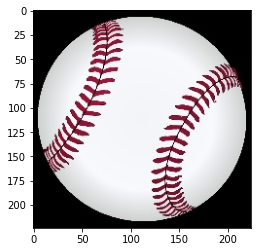

In [7]:
oneHotkeyLabels = getOneHotkeyLabels(dataset_image_path_list, 6)

print("==================================================")
print('OneHotkeyLabels : {} '.format(oneHotkeyLabels))
print("==================================================\n")

predictDatas(model, path_dataset_predict, image_width, oneHotkeyLabels)